In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import pywt.data

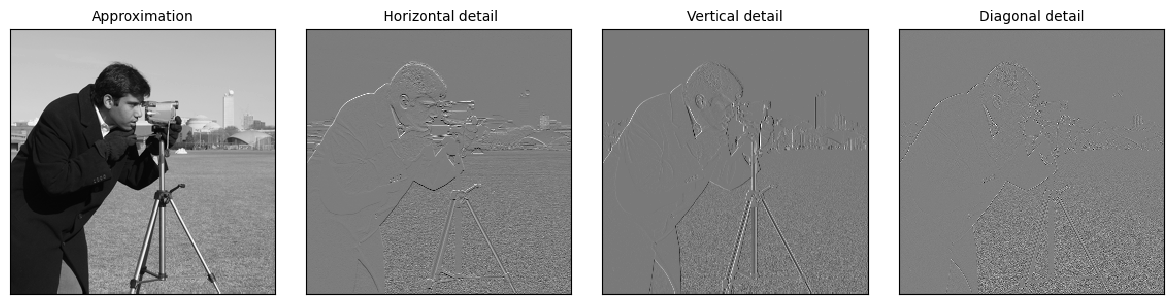

In [2]:
# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [45]:
original = cv2.imread("cat.png")
s = original.shape
sigma = 1

In [46]:
X = original.ravel()
X = X + sigma*np.random.randn(len(X))
X = np.clip(X, 0, 255)
cA, cD = pywt.dwt(X, 'db2')

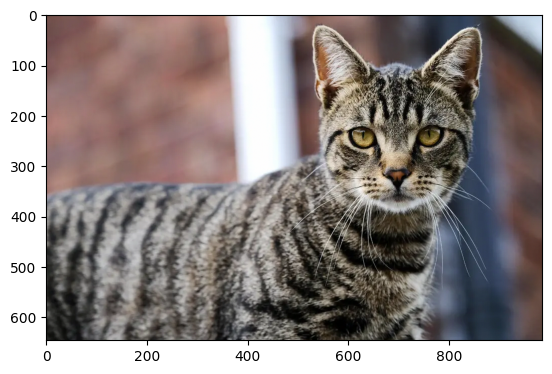

In [47]:
X_show = X.astype(np.uint8).reshape(s)[:,:,::-1]
plt.imshow(X_show)
plt.show()

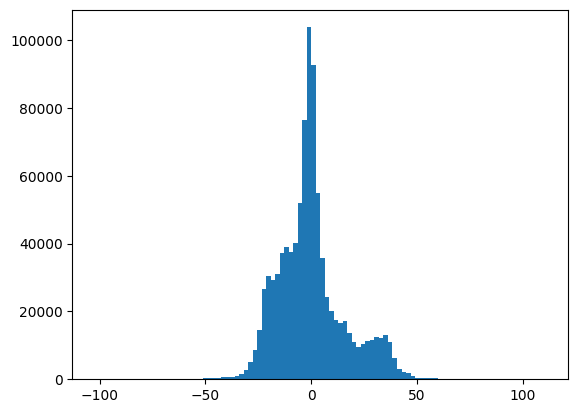

In [48]:
plt.hist(cD, bins=100)
plt.show()

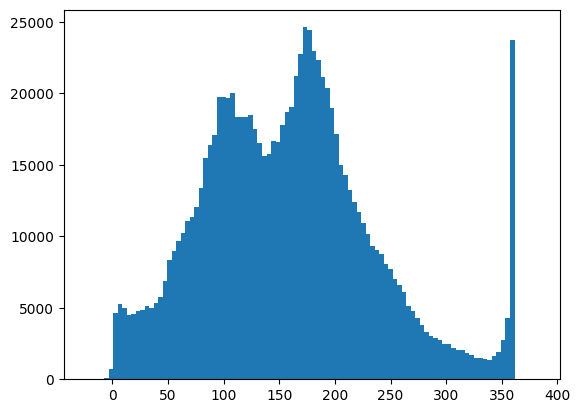

In [49]:
plt.hist(cA, bins=100)
plt.show()

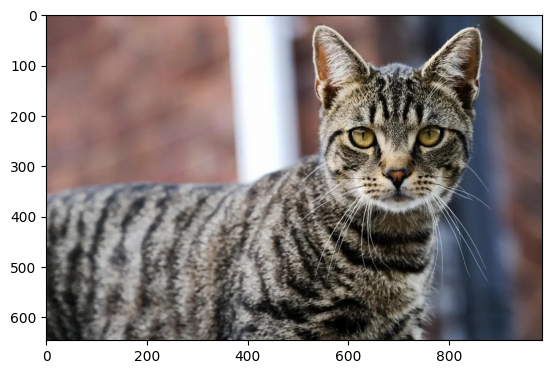

In [50]:
Xinv = pywt.idwt(cA, cD, 'db2')
imageInv_noisy = Xinv.astype(np.uint8).reshape(s)[:,:,::-1]
plt.imshow(imageInv_noisy)
plt.show()

In [51]:
from helpers import ml_estimate_gamma, map_estimate, mmse_estimate, grad_gamma, mse, ml_objective_gamma_sigma
import tqdm

In [52]:
step_size = 0.001
max_steps = 100

In [53]:
gammas = []
costs = []
for i in range(5):
    gamma_curr = np.random.randint(0, 1000)
    print("gamma init =", gamma_curr)
    # gamma_list = []
    # gamma_list.append(gamma_curr)

    for i in tqdm.tqdm(np.arange(max_steps)):
        gamma_curr = gamma_curr + step_size*grad_gamma(cD, gamma_curr, sigma)
        # gamma_list.append(gamma_curr)
    gammas.append(gamma_curr)
    costs.append(ml_objective_gamma_sigma(X, gamma_curr, sigma))

gamma init = 279


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.51it/s]


gamma init = 903


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.39it/s]


gamma init = 44


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.42it/s]


gamma init = 764


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.53it/s]


gamma init = 34


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.50it/s]


In [54]:
gamma_est = gammas[np.argmax(costs)]
print("gamma optimal = ", gamma_est)

gamma optimal =  629.4424466882343


In [55]:
cD_map = map_estimate(cD, sigma, gamma=gamma_est)
cD_mmse = mmse_estimate(cD, sigma, gamma=gamma_est)

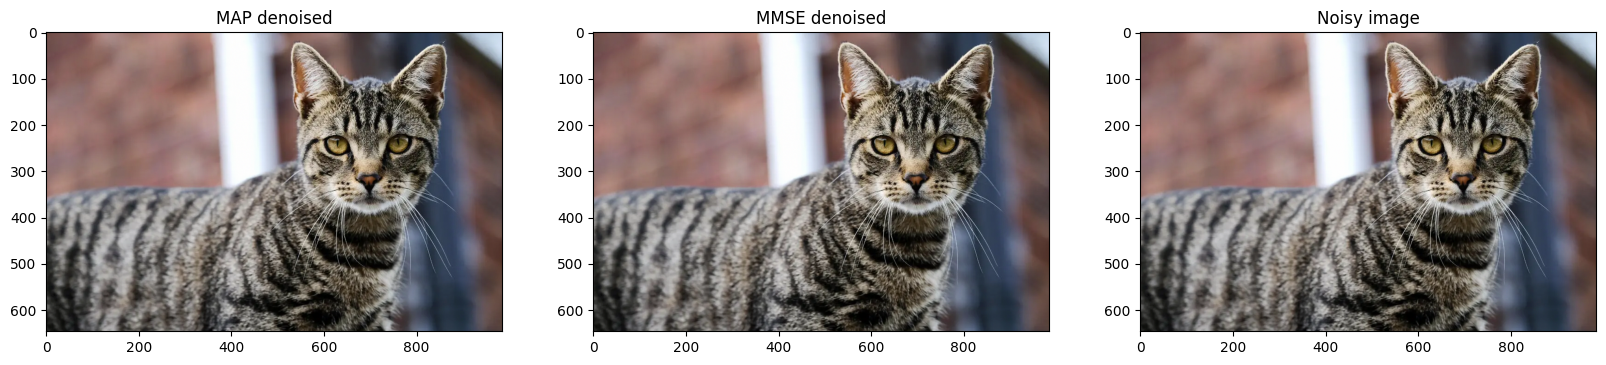

In [56]:
Xinv_map = pywt.idwt(cA, cD_map, 'db2')
imageInv_map = Xinv_map.astype(np.uint8).reshape(s)[:,:,::-1]
Xinv_mmse = pywt.idwt(cA, cD_mmse, 'db2')
imageInv_mmse = Xinv_mmse.astype(np.uint8).reshape(s)[:,:,::-1]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
axes = axes.ravel()
axes[0].imshow(imageInv_map)
axes[0].set_title("MAP denoised")
axes[1].imshow(imageInv_mmse)
axes[1].set_title("MMSE denoised")
axes[2].imshow(X_show)
axes[2].set_title("Noisy image")
plt.show()

In [57]:
original_show = original[:,:,::-1]

In [58]:
print("MAP MSE", mse(original_show, imageInv_map))
print("MMSE MSE", mse(original_show, imageInv_mmse))
print("Noise MSE", mse(original_show, X_show))

MAP MSE 1.3313274976033693
MMSE MSE 1.3317811548878167
Noise MSE 1.323068944382455
